In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from scipy import stats

In [3]:
data=pd.read_csv("crime.csv",encoding='latin-1')#Latin-1, also known as ISO-8859-1, is a similar encoding. Unicode code points 0–255 are identical to the Latin-1 values, so converting to this encoding simply requires converting code points to byte values; if a code point larger than 255 is encountered, the string can’t be encoded into Latin-1.
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
#Some interesting information from the dataset
max_street_crime = data['STREET'].value_counts().index[0]
max_year_crime = data['YEAR'].value_counts().index[0]
max_hour_crime = data['HOUR'].value_counts().index[0]
max_month_crime = data['MONTH'].value_counts().index[0]
max_day_crime = data['DAY_OF_WEEK'].value_counts().index[0]

month = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

print('Street with higher occurrence of crimes:', max_street_crime)
print('Year with highest crime occurrence:', max_year_crime)
print('Hour with highest crime occurrence:', max_hour_crime)
print('Month with highest crime occurrence:', month[max_month_crime-1], max_month_crime)
print('Day with highest crime occurrence:', max_day_crime)

Street with higher occurrence of crimes: WASHINGTON ST
Year with highest crime occurrence: 2017
Hour with highest crime occurrence: 17
Month with highest crime occurrence: August 8
Day with highest crime occurrence: Friday


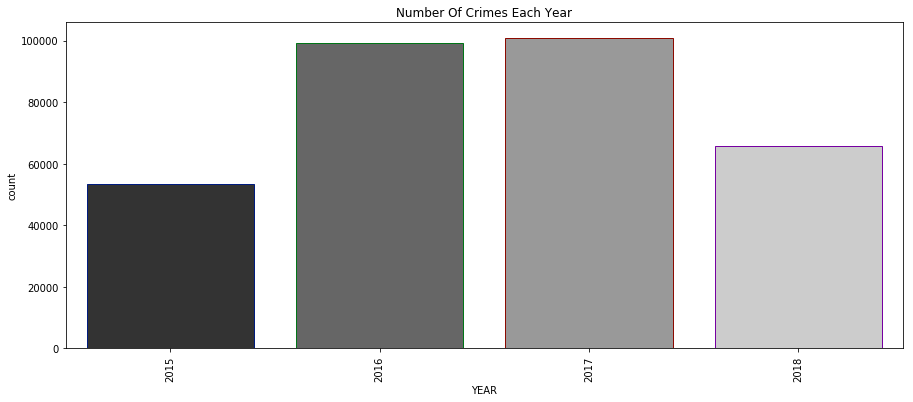

In [5]:
#Visualization of dataset
plt.subplots(figsize=(15,6))
sns.countplot('YEAR',data=data,palette='gray',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Year')
plt.show()
#inference from the below dataset:In this graph, we can see that 2016 and 2017 had the highest incidence of crime in the region.

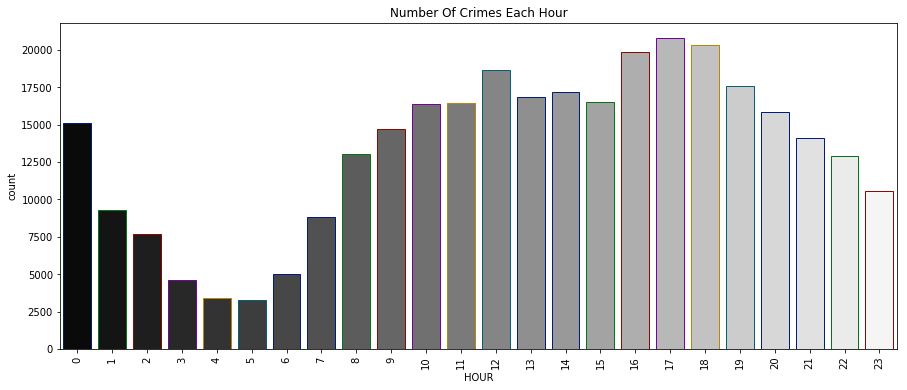

In [6]:
plt.subplots(figsize=(15,6))
sns.countplot('HOUR',data=data,palette='gray',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Hour')
plt.show()
#Inference:Here we can see that from 7 am onwards, the occurrence of crimes begins to rise, peaking at between 5 and 6 pm.

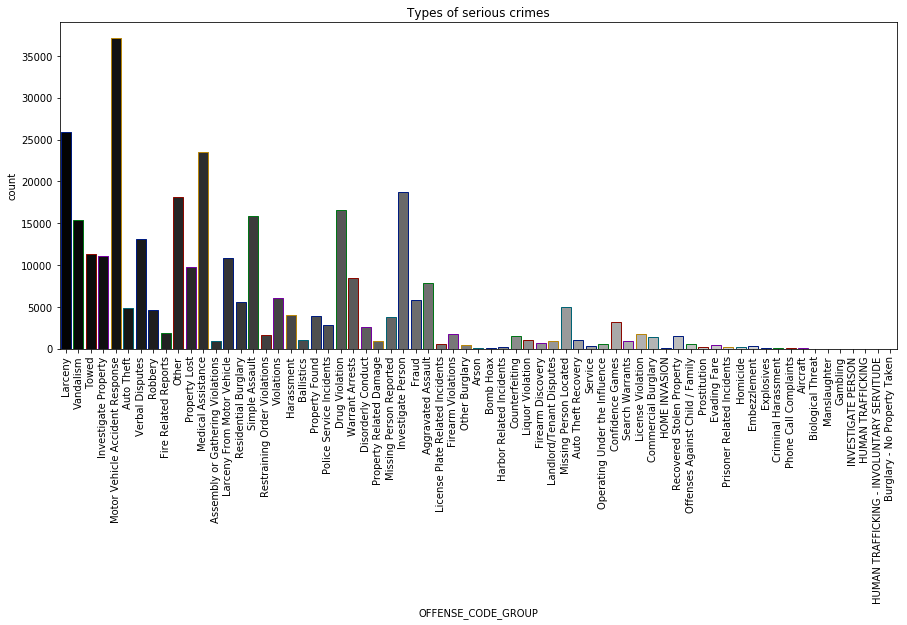

In [7]:
plt.subplots(figsize=(15,6))
sns.countplot('OFFENSE_CODE_GROUP',data=data,palette='gray',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Types of serious crimes')
plt.show()

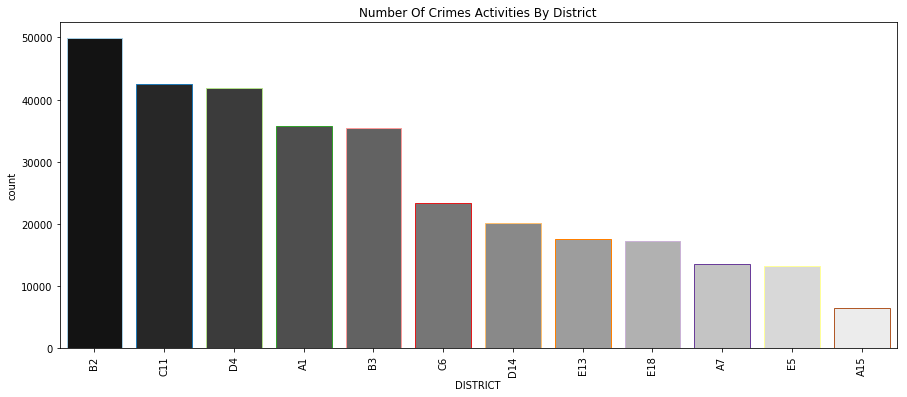

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('DISTRICT',data=data,palette='gray',edgecolor=sns.color_palette('Paired',20),order=data['DISTRICT'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Crimes Activities By District')
plt.show()
#inference for the below graph:In this graph, we organize the data by the district to observe the occurrence of crimes in each of them. With the ordered date, we can see and conclude that the neighborhood with the highest incidents of crime is B12, followed respectively by C11, D4, B4, C6, D14, E13, E18, A7, E5, and A15.

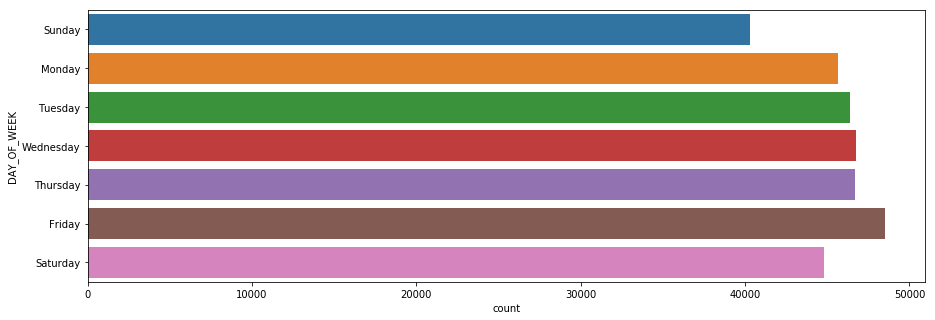

In [10]:
plt.figure(figsize=(15,5))
cPlot=sns.countplot(y="DAY_OF_WEEK",data=data, 
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
#What is the safest day to be out in the streets in Boston ?
#Interference:Based on the frequencey of the crimes, weekend appears to relatively safest day to be out in Boston.